# Prediksi Penyakit Jantung Menggunakan Dataset Cleveland Heart Disease

### 1) Pengumpulan Data



Dataset yang digunakan adalah dataset penyakit jantung dari UC Irvine Machine Learning Repository. Dataset dapat diakses melalui link berikut https://archive.ics.uci.edu/dataset/45/heart+disease. Dataset terdiri dari 4 dataset, yaitu Cleveland, Hungary, Switzerland, dan VA Long Beach. Pada kasus ini digunakan dataset Cleveland dengan nama file "cleveland.data".

### 2) Menelaah Data

Karakterisktik umum data dan pola data:
- Dataset terdiri dari 76 kolom 303 baris, 
- hanya 14 kolom yang digunakan.
- Terdapat 5 label : 0,1,2,3,4 (semakin besar angka nya, semakin parah penyakit jantungnya)
- terdapat missing value yang direpresentasikan dengan -9.0 

In [277]:
import pandas as pd
import re
import numpy as np
import itertools

In [278]:
# Gunakan kode ini jika dataset ada di penyimpanan lokal
dir = 'Dataset/heart+disease/cleveland.data'

In [279]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1 0 63 1 -9 -9 -9',
 '-9 1 145 1 233 -9 50 20',
 '1 -9 1 2 2 3 81 0',
 '0 0 0 0 1 10.5 6 13',
 '150 60 190 90 145 85 0 0',
 '2.3 3 -9 172 0 -9 -9 -9',
 '-9 -9 -9 6 -9 -9 -9 2',
 '16 81 0 1 1 1 -9 1',
 '-9 1 -9 1 1 1 1 1',
 '1 1 -9 -9 name']

In [280]:
# mengubah data menjadi dataframe
data = itertools.takewhile(
  lambda x: len(x) == 76,
  (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       282 non-null    object
 1   1       282 non-null    object
 2   2       282 non-null    object
 3   3       282 non-null    object
 4   4       282 non-null    object
 5   5       282 non-null    object
 6   6       282 non-null    object
 7   7       282 non-null    object
 8   8       282 non-null    object
 9   9       282 non-null    object
 10  10      282 non-null    object
 11  11      282 non-null    object
 12  12      282 non-null    object
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      282 non-null    object
 17  17      282 non-null    object
 18  18      282 non-null    object
 19  19      282 non-null    object
 20  20      282 non-null    object
 21  21      282 non-null    object
 22  22      282 non-null    ob

In [282]:
# memilih sebagian dari DataFrame df (semua kecuali kolom terakhir (nama))
df = df.iloc[:,:-1]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1,0,63,1,-9,-9,-9,-9,1,145,...,-9,1,1,1,1,1,1,1,-9,-9
1,2,0,67,1,-9,-9,-9,-9,4,160,...,-9,1,1,1,1,1,1,1,-9,-9
2,3,0,67,1,-9,-9,-9,-9,4,120,...,-9,2,2,1,1,1,7,3,-9,-9
3,4,0,37,1,-9,-9,-9,-9,3,130,...,-9,1,1,1,1,1,1,1,-9,-9
4,6,0,41,0,-9,-9,-9,-9,2,130,...,-9,1,1,1,1,1,1,1,-9,-9


In [283]:
# menghapus kolom pertama (id pasien) dari DataFrame df.
df = df.drop(df.columns[0], axis=1)
df.head()


,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0,63,1,-9,-9,-9,-9,1,145,1,...,-9,1,1,1,1,1,1,1,-9,-9
1,0,67,1,-9,-9,-9,-9,4,160,1,...,-9,1,1,1,1,1,1,1,-9,-9
2,0,67,1,-9,-9,-9,-9,4,120,1,...,-9,2,2,1,1,1,7,3,-9,-9
3,0,37,1,-9,-9,-9,-9,3,130,0,...,-9,1,1,1,1,1,1,1,-9,-9
4,0,41,0,-9,-9,-9,-9,2,130,1,...,-9,1,1,1,1,1,1,1,-9,-9


In [284]:
# mengubah tipe data seluruh nilai dalam DataFrame df menjadi float sesuai dengan nilai null yaitu -9.0
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       282 non-null    float64
 4   5       282 non-null    float64
 5   6       282 non-null    float64
 6   7       282 non-null    float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      282 non-null    float64
 12  13      282 non-null    float64
 13  14      282 non-null    float64
 14  15      282 non-null    float64
 15  16      282 non-null    float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      282 non-null    float64
 22  23

### 3) Validasi Data


Memastikan data valid dan dapat diandalkan dengan cara Validasi Tipe Data, Validasi Missing Values (mengubah -9.0 menjadi NaN sebegai representasi nilai NULL), Validasi Duplikasi.
Dua metode validasi data : 
- Validasi Tipe Data
- Validasi Missing Values 

In [285]:
# menggantikan setiap nilai -9.0 dalam DataFrame dengan nilai NaN
df.replace(-9.0, np.nan, inplace=True)

df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [286]:
# menghitung jumlah nilai-nilai yang hilang (NaN) dalam setiap kolom dari objek DataFrame yang disimpan dalam variabel df
df.isnull().sum()

1       0
2       0
3       0
4     282
5     282
     ... 
70      0
71      0
72      0
73    282
74    282
Length: 74, dtype: int64

In [287]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       0 non-null      float64
 4   5       0 non-null      float64
 5   6       0 non-null      float64
 6   7       0 non-null      float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      0 non-null      float64
 12  13      277 non-null    float64
 13  14      277 non-null    float64
 14  15      282 non-null    float64
 15  16      23 non-null     float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      280 non-null    float64
 22  23

### 4) Menentukan Object Data


Objek data utama dalam dataset ini adalah 14 kolom berikut:
      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num) 

karena 14 kolom tersebut berpengaruh signifikan terhadap hasil.

In [289]:
# Memilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]

df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [290]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       282 non-null    float64
 1   3       282 non-null    float64
 2   8       282 non-null    float64
 3   9       282 non-null    float64
 4   11      282 non-null    float64
 5   15      282 non-null    float64
 6   18      282 non-null    float64
 7   31      282 non-null    float64
 8   37      282 non-null    float64
 9   39      282 non-null    float64
 10  40      282 non-null    float64
 11  43      280 non-null    float64
 12  50      280 non-null    float64
 13  57      282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [291]:
# mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True)

df_selected.head()


/var/folders/cf/w7254k811d79k5l3f_5kw9zh0000gp/T/ipykernel_72602/692977977.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [292]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [293]:
# menghitung jumlah nilai unik dalam setiap kolom
df_selected.nunique()

age          41
sex           2
cp            4
trestbps     48
chol        145
fbs           2
restecg       3
thalach      90
exang         2
oldpeak      39
slope         3
ca            4
thal          3
target        5
dtype: int64

In [294]:
# Menghitung jumlah data dari nilai unik dalam setiap kolom
for col in df_selected.columns :
    print(col, ': ')
    print(df_selected[col].value_counts())
    print(" ")

age : 
age
58.0    16
54.0    16
57.0    14
59.0    13
52.0    13
51.0    12
60.0    12
62.0    11
44.0    10
64.0    10
56.0     9
41.0     9
53.0     8
67.0     8
65.0     8
42.0     8
43.0     8
45.0     7
61.0     7
46.0     7
63.0     7
66.0     7
50.0     7
48.0     7
55.0     6
47.0     5
49.0     5
70.0     4
39.0     4
35.0     3
68.0     3
69.0     3
71.0     3
40.0     3
34.0     2
37.0     2
29.0     1
77.0     1
38.0     1
74.0     1
76.0     1
Name: count, dtype: int64
 
sex : 
sex
1.0    191
0.0     91
Name: count, dtype: int64
 
cp : 
cp
4.0    133
3.0     84
2.0     43
1.0     22
Name: count, dtype: int64
 
trestbps : 
trestbps
120.0    34
130.0    33
140.0    30
110.0    18
150.0    17
138.0    11
160.0    11
128.0    11
125.0    10
112.0     9
132.0     7
118.0     7
135.0     6
108.0     6
124.0     5
134.0     5
145.0     5
152.0     4
100.0     4
126.0     3
115.0     3
136.0     3
122.0     3
180.0     3
170.0     3
142.0     3
105.0     3
94.0      2
146.0     2

### 5) Membersihkan Data


Mengatasi nilai yang hilang dengan menghapus atribut apabila nilai NULL berjumlah lebih dari 50%, selain itu nilai NULL diisi dengan rata-rata dari setiap kolom.

In [295]:
# menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom dari DataFrame df_selected.
df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
target      0
dtype: int64

In [296]:
# # menghapus kolom-kolom tertentu dari dataframe
# columns_to_drop = ['slope', 'ca', 'thal']
# df_selected = df_selected.drop(columns_to_drop, axis=1)

# df_selected.isnull().sum()

In [297]:
# Pengisian nilia null dengan rata-rata
# mengambil data kolom-kolom tertentu tanpa nilai null nya
meanca = df_selected['ca'].dropna()
meanthal = df_selected['thal'].dropna()

In [298]:
# mengubah tipe data dari variabel-variabel yang berisi rata-rata kolom-kolom tertentu menjadi tipe data float
meanca = meanca.astype(float)
meanthal = meanthal.astype(float)


In [299]:
# menghitung rata-rata (dibulatkan) dari variabel-variabel yang berisi rata-rata kolom-kolom tertentu
meanca = round(meanca.mean())
meanthal = round(meanthal.mean())


In [300]:
# mengubah nilai null menjadi nilai rata-rata yang sudah ditentukan sebelumnya
fill_values = {'ca': meanca, 'thal': meanthal}
dfClean = df_selected.fillna(value=fill_values)

dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [301]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [302]:
# mendeteksi dan menampilkan baris-baris duplikat dalam DataFrame dfClean
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [303]:
# mencetak semua baris duplikat dalam DataFrame dfClean
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [304]:
# menghapus baris-baris duplikat dari DataFrame dfClean 
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [305]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [306]:
# menghitung jumlah kemunculan setiap nilai dalam kolom "target" pada DataFrame dfClean
dfClean['target'].value_counts()

target
0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: count, dtype: int64

In [307]:
# menambahakn library untuk membuat plot dan visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

In [308]:
# menghitung koefisien korelasi antara semua pasangan kolom numerik dalam DataFrame dfClean
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.091125,0.077383,0.274466,0.218295,0.104400,0.134438,-0.393266,0.087174,0.195740,0.156108,0.353728,0.103751,0.210747
sex,-0.091125,1.000000,0.022619,-0.058920,-0.189397,0.054396,0.032665,-0.054792,0.189095,0.103771,0.040438,0.095005,0.389126,0.239516
cp,0.077383,0.022619,1.000000,-0.070886,0.098889,-0.071550,0.061007,-0.318512,0.364757,0.173221,0.147143,0.208906,0.259609,0.383891
trestbps,0.274466,-0.058920,-0.070886,1.000000,0.157118,0.142902,0.128652,-0.029739,0.061072,0.197026,0.137713,0.080754,0.122973,0.151776
chol,0.218295,-0.189397,0.098889,0.157118,1.000000,0.019506,0.166490,-0.018392,0.088988,0.044771,0.000546,0.129764,0.040570,0.098895
fbs,0.104400,0.054396,-0.071550,0.142902,0.019506,1.000000,0.054025,0.019948,0.027573,-0.024812,0.056060,0.117625,0.064050,0.039690
restecg,0.134438,0.032665,0.061007,0.128652,0.166490,0.054025,1.000000,-0.082132,0.088781,0.107675,0.155901,0.112083,0.020806,0.187365
thalach,-0.393266,-0.054792,-0.318512,-0.029739,-0.018392,0.019948,-0.082132,1.000000,-0.374316,-0.344748,-0.384825,-0.254544,-0.256681,-0.396194
exang,0.087174,0.189095,0.364757,0.061072,0.088988,0.027573,0.088781,-0.374316,1.000000,0.285568,0.263093,0.151577,0.334712,0.398880
oldpeak,0.195740,0.103771,0.173221,0.197026,0.044771,-0.024812,0.107675,-0.344748,0.285568,1.000000,0.600446,0.253958,0.331229,0.487529


<Axes: >

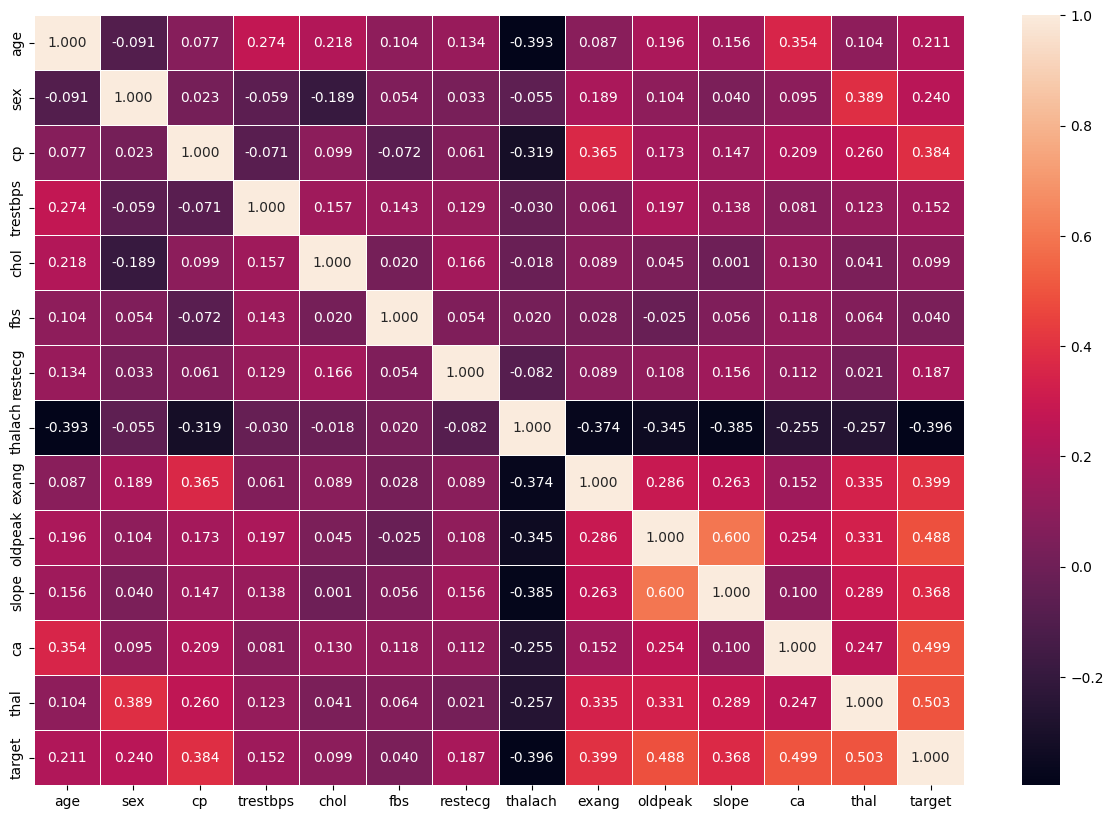

In [309]:
# membuat sebuah heatmap dari matriks korelasi 
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")


### 6) Konstruksi Data


In [310]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [311]:
df

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.0,39.0,0.0,NaN,NaN,NaN,NaN,3.0,138.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN
278,0.0,57.0,1.0,NaN,NaN,NaN,NaN,2.0,154.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
279,0.0,58.0,0.0,NaN,NaN,NaN,NaN,4.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
280,0.0,57.0,1.0,NaN,NaN,NaN,NaN,4.0,110.0,1.0,...,NaN,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [312]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [313]:

# memisahkan fitur-fitur dalam variabel X dan variabel target dalam variabel y (Raw data)
X_raw = df.drop(57,axis=1).values
y_raw = df.iloc[57]

# memisahkan fitur-fitur dalam variabel X dan variabel target dalam variabel y (Clean data)
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

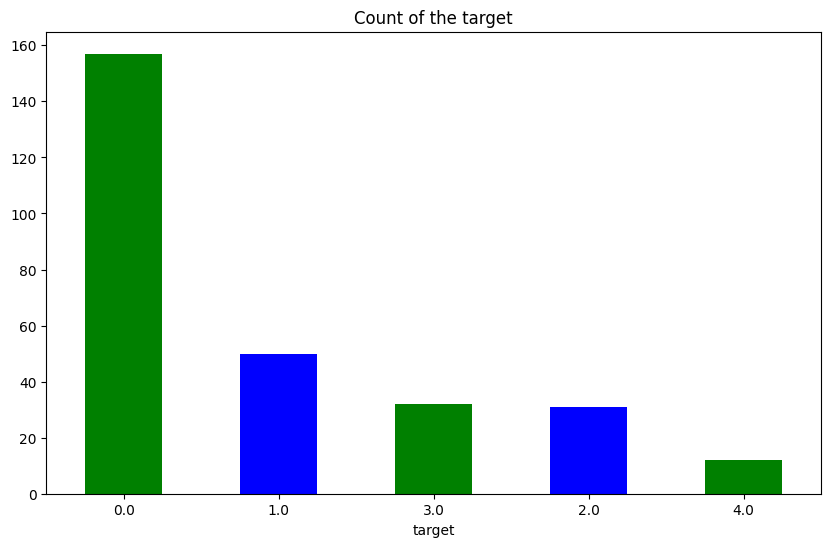

In [314]:
# Mengecek persebaran jumlah target menggunakan diagram batang.
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

In [315]:
# mengimpor fungsi SMOTE 
from imblearn.over_sampling import SMOTE

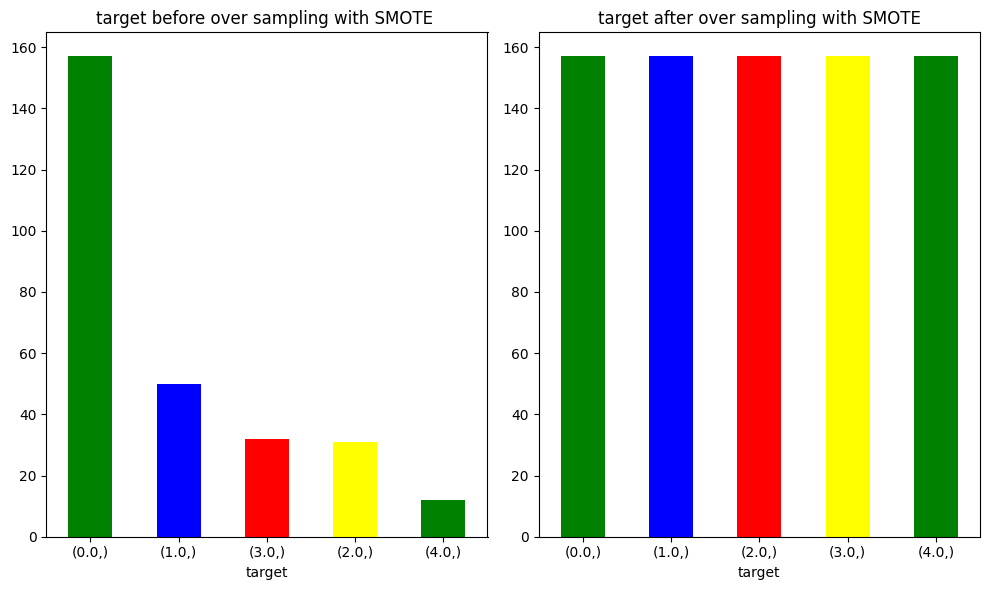

In [316]:
# oversampling dengan smote
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

In [317]:
# menghitung jumlah kemunculan setiap nilai dari variabel y (sebelum oversampling)
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       157
1.0        50
3.0        32
2.0        31
4.0        12
Name: count, dtype: int64

In [318]:
# menghitung jumlah kemunculan setiap nilai dari variabel y (sebelum oversampling)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       157
1.0       157
2.0       157
3.0       157
4.0       157
Name: count, dtype: int64

In [319]:
# mendapatkan ringkasan statistik dari DataFrame dfClean
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.666667,4.680851,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,0.933113,1.932377,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [320]:
# Normalisasi menggunakan minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

785

In [321]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.559445,0.780664,0.811789,0.374596,0.285383,0.140162,0.602946,0.542237,0.456058,0.238072,0.381666,0.349198,0.639917
std,0.168570,0.374983,0.283246,0.149340,0.111147,0.310030,0.440893,0.161073,0.443026,0.180516,0.258547,0.323277,0.423356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,0.659984,0.666667,0.264151,0.207870,0.000000,0.000000,0.422710,0.000000,0.091628,0.097991,0.000000,0.119594
50%,0.583333,1.000000,1.000000,0.358491,0.280822,0.000000,0.887086,0.543578,0.348039,0.225806,0.500000,0.333333,0.892559
75%,0.678864,1.000000,1.000000,0.469468,0.356164,0.000000,1.000000,0.668935,1.000000,0.368408,0.500000,0.657261,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [322]:
# Memasukkan fungsi untuk split data
from sklearn.model_selection import train_test_split

# # membagi fitur dan target menjadi data train dan test (raw data)
# X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42,stratify=y_raw)

# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

### 7) Modelling


In [323]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')
    metric_dict={'accuracy': round(acc,3),
                'recall': round(rcl,3),
                'F1 score': round(f1,3),
                'Precision score': round(ps,3)
                }
    return print(metric_dict)

In [324]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#### a) RAW


##### 1) Random Forest

In [325]:
# model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# model_rf.fit(X_train_raw, y_train_raw)

In [326]:
# y_pred_rf = model_rf_smote.predict(X_test)

# # Evaluate the Random Forest model
# print("\nRandom Forest Model:")
# accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
# print("Accuracy:",accuracy_rf_smote)
# print("Classification Report:")
# print(classification_report(y_test, y_pred_rf))

#### b) Oversample

##### 1) Random Forest

##### 2) Linear Regression

In [327]:
model_rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_smote.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [328]:
y_pred_rf = model_rf_smote.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.949
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        32
         1.0       1.00      0.87      0.93        31
         2.0       0.91      0.94      0.92        31
         3.0       0.97      0.97      0.97        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



#### c) Oversample + Normalisasi

#### d) Oversample + Normalisasi + Tunning